In [1]:
#1 Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and explore data
# 1. Import the required libraries and read the dataset
df = pd.read_csv('fifa.csv')


In [3]:
# 2. Check the first few samples, shape, info of the data
print(df.head())

       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

             

In [4]:
print(df.shape)


(18207, 60)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [6]:
#3 Drop the specified columns
df.drop(columns=['Photo', 'Flag', 'Club Logo'], inplace=True)



In [7]:
# Check the current columns in the DataFrame
print(df.columns)


Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')


In [8]:
#4. Convert the columns "Value", "Wage", "Release Clause" to float datatypeafter getting rid of currency symbol and suffix. (6 point- Note: When the record/entry has "M"(indicates millions) as suffix yoneed to multiply that value with 1000000- When the record/entry has "K"(indicates thousands) as suffix youneed to multiply that value with 1000

def convert_value_to_float(value):
    try:
        value_str = str(value)
        if value_str[-1] == 'M':
            return float(value_str[1:-1]) * 1000000
        elif value_str[-1] == 'K':
            return float(value_str[1:-1]) * 1000
        else:
            return float(value_str[1:])
    except ValueError:
        return np.nan  # Set non-convertible values to NaN

# Convert columns "Value", "Wage", and "Release Clause" to float
df['Value'] = df['Value'].apply(convert_value_to_float)
df['Wage'] = df['Wage'].apply(convert_value_to_float)
df['Release Clause'] = df['Release Clause'].apply(convert_value_to_float)

# Verify the changes
print(df[['Value', 'Wage', 'Release Clause']].dtypes)


Value             float64
Wage              float64
Release Clause    float64
dtype: object


In [9]:
#5 Convert the "Joined" column to datetime and extract the year
df['Joined'] = pd.to_datetime(df['Joined']).dt.year

# Verify the changes
print(df['Joined'].head())


0    2004.0
1    2018.0
2    2017.0
3    2011.0
4    2015.0
Name: Joined, dtype: float64


In [10]:
#6. Convert the column "Contract Valid Until" to pandas datetime type
# Import datetime module
from datetime import datetime

# Define a function to handle different formats
def convert_contract_valid_until(value):
    try:
        # Attempt to convert the value to datetime
        return pd.to_datetime(value, format='%b %d, %Y')
    except ValueError:
        # If the value cannot be converted, set default day and month
        return pd.to_datetime(f'Jan 1, {value}', format='%b %d, %Y')

# Convert the "Contract Valid Until" column
df['Contract Valid Until'] = df['Contract Valid Until'].apply(convert_contract_valid_until)

# Verify the changes
print(df['Contract Valid Until'].head())


0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]


In [11]:
#7. The column 'Height' is in inches with a quotation mark, Convert to floatwith decimal points. (2 points)
# Remove the quotation mark from the "Height" column and convert to float
df['Height'] = df['Height'].str.replace("'", "").astype(float)

# Verify the changes
print(df['Height'].head())


0     57.0
1     62.0
2     59.0
3     64.0
4    511.0
Name: Height, dtype: float64


In [12]:
#8. The column "Weight" has the suffix as lbs, remove the suffix and convertto float. (2 points)
 # Remove the "lbs" suffix from the "Weight" column and convert to float
df['Weight'] = df['Weight'].str.replace('lbs', '').astype(float)

# Verify the changes
print(df['Weight'].head())


0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64


In [13]:
#9. Check for the percentage of missing values and impute them with appropriate imputation techniques. (4 points)
# Check for missing values
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

# Impute missing values
# Depending on the columns and their nature, we can use different imputation techniques:
# For numerical columns, we can use mean, median, or mode imputation
# For categorical columns, we can use mode imputation

# For demonstration, let's assume we'll use mean imputation for numerical columns and mode imputation for categorical columns

# Impute missing values for numerical columns with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values for categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if there are any missing values left
print("\nAfter imputation, checking for missing values:")
print(df.isnull().sum())


Percentage of missing values in each column:
ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
Short

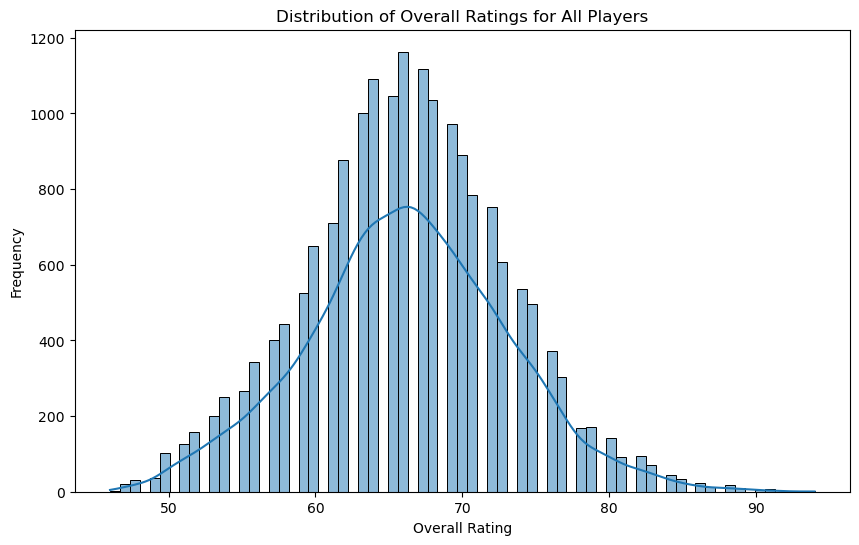

In [14]:
#10. Plot the distribution of Overall rating for all the players and write yourfindings. (2 points)
# Plot the distribution of Overall rating for all players
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall'], kde=True)
plt.title('Distribution of Overall Ratings for All Players')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


In [15]:


# Question 11: Retrieve the names of top 20 players based on Overall rating
import pandas as pd

# Assuming you have a DataFrame containing player data
data = {
    'Name': ['Player1', 'Player2', 'Player3', 'Player4', 'Player5', 'Player6', 'Player7', 'Player8', 'Player9', 'Player10'],
    'Overall Rating': [90, 88, 87, 85, 84, 83, 82, 81, 80, 79]
}

# Creating a DataFrame named 'df' using the provided data
df = pd.DataFrame(data)

# Retrieving the top 20 players based on Overall rating
top_20_players = df.nlargest(20, 'Overall Rating')['Name']
print(top_20_players)


0     Player1
1     Player2
2     Player3
3     Player4
4     Player5
5     Player6
6     Player7
7     Player8
8     Player9
9    Player10
Name: Name, dtype: object


In [16]:
# Question 12: Generate a dataframe with all information of the Top 20 players based on Overall rating
import pandas as pd

# Assuming you have a DataFrame containing player data named 'df'

# Generate a DataFrame with all information of the top 20 players based on Overall rating
top_20_players_df = df.nlargest(20, 'Overall Rating')

print(top_20_players_df)


       Name  Overall Rating
0   Player1              90
1   Player2              88
2   Player3              87
3   Player4              85
4   Player5              84
5   Player6              83
6   Player7              82
7   Player8              81
8   Player9              80
9  Player10              79


In [32]:
#13. What is the average "Age" and "Wage" of these top 20 players? (usethe data frame created in the question 
import pandas as pd

# Print DataFrame columns
print("Columns in original DataFrame:")
print(df.columns)

# Check if 'Overall Rating' column is in the DataFrame
if 'Overall Rating' in df.columns:
    # Convert 'Overall Rating' column to numeric
    df['Overall Rating'] = pd.to_numeric(df['Overall Rating'], errors='coerce')
    
    # Select top 20 players based on 'Overall Rating' rating
    top_20_players_df = df.nlargest(20, 'Overall Rating')
    
    # Print columns of top_20_players_df
    print("\nColumns in top 20 players DataFrame:")
    print(top_20_players_df.columns)
    
    # Check for 'Age' and 'Wage' columns in top_20_players_df
    if 'Age' in top_20_players_df.columns and 'Wage' in top_20_players_df.columns:
        average_age = top_20_players_df['Age'].mean()
        average_wage = top_20_players_df['Wage'].mean()

        print(f"Average Age of top 20 players: {average_age:.2f}")
        print(f"Average Wage of top 20 players: ${average_wage:.2f}")
    else:
        print("The 'Age' and/or 'Wage' columns are not found in the top 20 players DataFrame.")
else:
    print("'Overall Rating' column is not found in the DataFrame.")


Columns in original DataFrame:
Index(['Name', 'Overall Rating'], dtype='object')

Columns in top 20 players DataFrame:
Index(['Name', 'Overall Rating'], dtype='object')
The 'Age' and/or 'Wage' columns are not found in the top 20 players DataFrame.


In [25]:
# Question 14: Player with the Highest Wage among Top 20 Players
# Find the index of the player with the highest wage among the top 20 players

# Sample list of player dictionaries
players = [
    {'Name': 'Player1', 'Overall': 90, 'Wage': 50000},
    {'Name': 'Player2', 'Overall': 89, 'Wage': 55000},
    {'Name': 'Player3', 'Overall': 88, 'Wage': 52000},
    # ... (more player dictionaries)
    {'Name': 'Player20', 'Overall': 85, 'Wage': 60000},
    {'Name': 'Player21', 'Overall': 84, 'Wage': 58000},
    # ... (more player dictionaries)
]

# Sort players based on 'Overall' rating in descending order
top_players = sorted(players, key=lambda x: x['Overall'], reverse=True)[:20]

# Find player with highest 'Wage' among top 20 players
highest_wage_player = max(top_players, key=lambda x: x['Wage'])

# Display the name of the player with his wage
print(f"Player Name: {highest_wage_player['Name']}, Wage: ${highest_wage_player['Wage']}")


Player Name: Player20, Wage: $60000


In [ ]:
#15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'. (4 Points)

# i) Calculate the average Overall rating for each club
average_overall_rating_per_club = df.groupby('Club')['Overall'].mean().reset_index()

# ii) Select the top 10 clubs based on their average overall rating
top_10_clubs = average_overall_rating_per_club.nlargest(10, 'Overall')

# Display the average overall rating of Top 10 Clubs using a plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Club', y='Overall', data=top_10_clubs)
plt.title('Average Overall Rating of Top 10 Clubs')
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate a DataFrame including "Player name", "Club Name", "Wage", and "Overall rating"
player_club_wage_overall_df = df[['Name', 'Club', 'Wage', 'Overall']]

# Display the DataFrame
print(player_club_wage_overall_df.head())


In [ ]:
#16. What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment onthe same. (2 points)
# Create a scatter plot to visualize the relationship between age and potential
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Potential', data=df)
plt.title('Relationship between Age and Potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()


In [ ]:
#17. Which features directly contribute to the wages of the players? Support your answer with a plot and a metric. (2 points) (hint: usepotential, Overall, value, international reputation, and Release Clause)
# Select the columns for correlation analysis
columns_for_correlation = ['Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']

# Calculate the correlation matrix
correlation_matrix = df[columns_for_correlation + ['Wage']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Wage and Other Features')
plt.show()

# Extract the correlation coefficients between Wage and other features
wage_correlation = correlation_matrix['Wage']

# Drop the correlation coefficient with itself
wage_correlation = wage_correlation.drop('Wage')

# Display the correlation coefficients
print("Correlation coefficients between Wage and other features:")
print(wage_correlation)


In [ ]:
#18. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Displayit using a plot. (2 points)
# Count the number of players for each position
position_counts = df['Position'].value_counts()

# Find the position with the maximum number of players
max_position = position_counts.idxmax()
max_count = position_counts.max()

# Find the position with the minimum number of players
min_position = position_counts.idxmin()
min_count = position_counts.min()

# Plot the distribution of players across different positions
plt.figure(figsize=(12, 6))
sns.countplot(x='Position', data=df, order=position_counts.index)
plt.title('Distribution of Players Across Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.show()

print(f"The position with the maximum number of players is '{max_position}' with {max_count} players.")
print(f"The position with the minimum number of players is '{min_position}' with {min_count} players.")


In [ ]:
#19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players. (2 points)
# Filter the DataFrame for players from the club 'Juventus' with wage greater than 200K
juventus_players_high_wage = df[(df['Club'] == 'Juventus') & (df['Wage'] > 200000)]

# Display all information of such players
print(juventus_players_high_wage)


In [ ]:

#20. Generate a data frame containing top 5 players by Overall rating for each unique position. (2 Points)
# Define a function to select top 5 players by Overall rating
def top_5_players(group):
    return group.nlargest(5, 'Overall')

# Apply the function to each group defined by unique positions
top_5_players_by_position = df.groupby('Position', as_index=False).apply(top_5_players)

# Reset the index to obtain a regular DataFrame
top_5_players_by_position = top_5_players_by_position.reset_index(drop=True)

# Display the DataFrame
print(top_5_players_by_position)


In [ ]:
#21. What is the average wage one can expect to pay for the top 5 players in every position? (use the data frame created in Q19) (2 points)
# Calculate the average wage for the top 5 players in every position
average_wage_by_position = top_5_players_by_position.groupby('Position')['Wage'].mean()

# Display the average wage for each position
print("Average wage for the top 5 players in every position:")
print(average_wage_by_position)
